In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [10]:
'''
In this fourth round of Prosperity a new luxury product is introduced: `MAGNIFICENT MACARONS`. `MAGNIFICENT MACARONS` are a delicacy and their value is dependent on all sorts of observable factors like hours of sun light, sugar prices, shipping costs, in- & export tariffs and suitable storage space. Can you find the right connections to optimize your program? 

Position limits for the newly introduced products:

- `MAGNIFICENT_MACARONS`: 75
- Conversion Limit for `MAGNIFICENT_MACARONS` = 10
'''

'''
1. ConversionObservation (detailed in “[Writing an Algorithm in Python](https://www.notion.so/Writing-an-Algorithm-in-Python-17be8453a09381988c6ed45b1b597049?pvs=21)” under E-learning center) shows quotes of `MAGNIFICENT_MACARONS` offered by the chefs from Pristine Cuisine
2. To purchase 1 unit of `MAGNIFICENT_MACARONS` from Pristine Cuisine, you will purchase at askPrice, pay `TRANSPORT_FEES` and `IMPORT_TARIFF`
3. To sell 1 unit of `MAGNIFICENT_MACARONS` to Pristine Cuisine, you will sell at bidPrice, pay `TRANSPORT_FEES` and `EXPORT_TARIFF`
4. You can ONLY trade with Pristine Cuisine via the conversion request with applicable conditions as mentioned in the wiki
5. For every 1 unit of `MAGNIFICENT_MACARONS` net long position, storage cost of 0.1 Seashells per timestamp will be applied for the duration that position is held. No storage cost applicable to net short position


we have to already be long / short earlier to be able to convert
can only convert at most to neutral at 0, not more than that

AKA we buy / sell from our own island
if position mispriced we sell to other island easily
'''


class Product:
    MACARONS = 'MAGNIFICENT_MACARONS'


In [11]:
prices = pd.concat([pd.read_csv(f'round4/prices_round_4_day_{i}.csv', sep=';') for i in range(1, 4)], ignore_index=True)
trades = pd.concat([pd.read_csv(f'round4/trades_round_4_day_{i}_nn.csv', sep=';') for i in range(1, 4)], ignore_index=True)
observations = []
for day in range(1, 4):
    odf = pd.read_csv(f'round4/observations_round_4_day_{day}.csv')
    odf['day'] = day
    observations.append(odf)
observations = pd.concat(observations, ignore_index=True)

In [12]:
macarons = prices[prices['product'] == Product.MACARONS].reset_index(drop=True).copy()
observations = observations.rename({'bidPrice': 'islandBid', 'askPrice': 'islandAsk'}, axis=1)
observations['island_mid'] = (observations['islandBid'] + observations['islandAsk']) / 2
mk = observations.merge(macarons, on=['day', 'timestamp'])
mk['time'] = mk['timestamp'] + (mk['day'] - 1) * 1_000_000

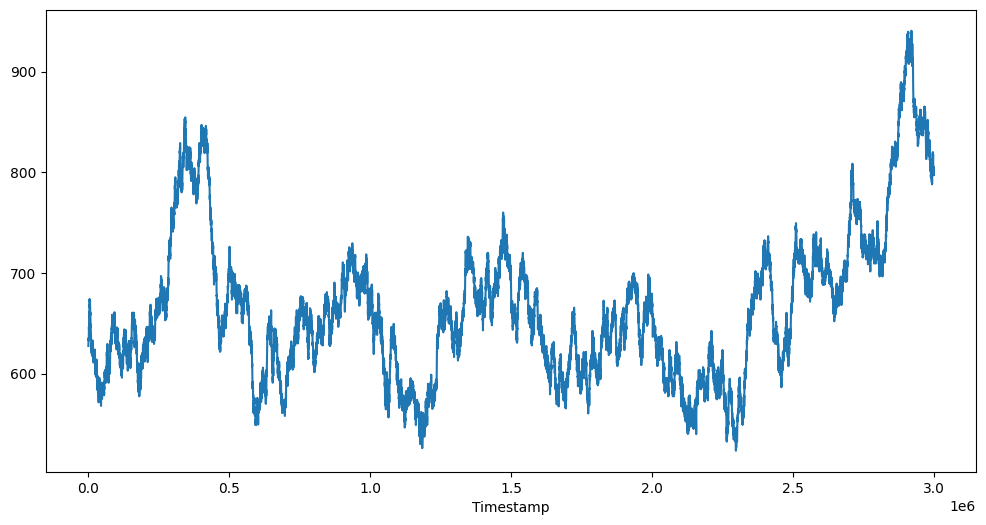

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(mk['time'], mk['mid_price'], label='Observation')
plt.xlabel('Timestamp')
plt.show()

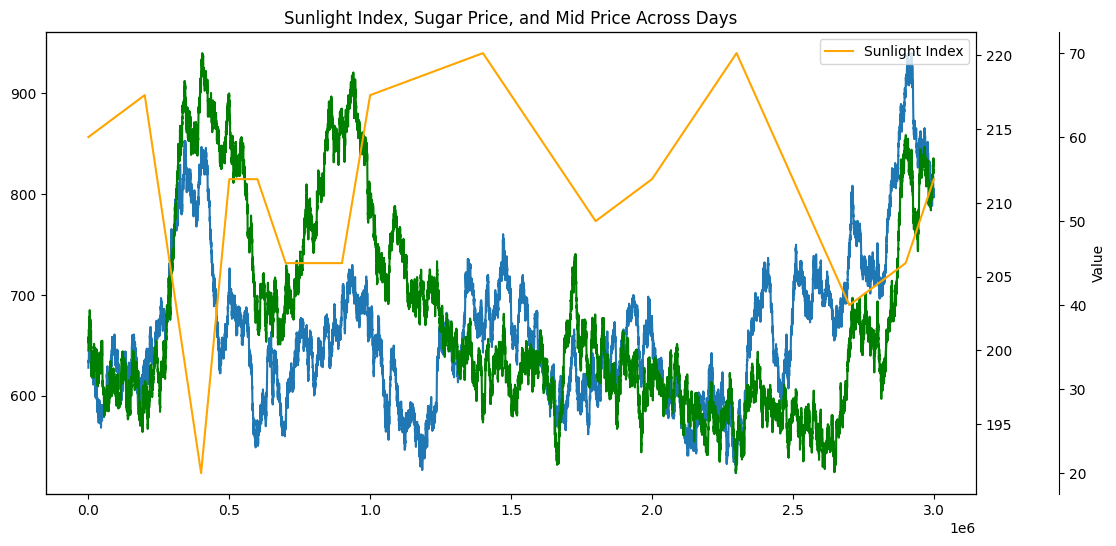

In [14]:
# plot sunlightIndex, sugarPrice, and midPrice against time
fig, ax1 = plt.subplots(figsize=(12, 6))

ax2 = ax1.twinx()
ax3 = ax1.twinx()

# Offset the third axis to avoid overlap
ax3.spines['right'].set_position(('outward', 60))
ax1.plot(mk['time'], mk['island_mid'], label='Mid Price')
ax2.plot(mk['time'], mk['sugarPrice'], label='Sugar Price', color='green')
ax3.plot(mk['time'], mk['sunlightIndex'], label='Sunlight Index', color='orange')
plt.xlabel('time')
plt.ylabel('Value')
plt.title('Sunlight Index, Sugar Price, and Mid Price Across Days')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [ ]:
'''
hypothesis:
- island mid is most accurately predicted by sunlight and sugar
- 

'''

In [167]:
return_windows = [1, 2, 5, 10, 15, 20, 25, 30, 50, 100]

for w in return_windows:
    mk[f'macaron_returns_{w}'] = np.log(mk['mid_price'] / mk['mid_price'].shift(w))
    mk[f'sugar_returns_{w}'] = np.log(mk['sugarPrice'] / mk['sugarPrice'].shift(w))


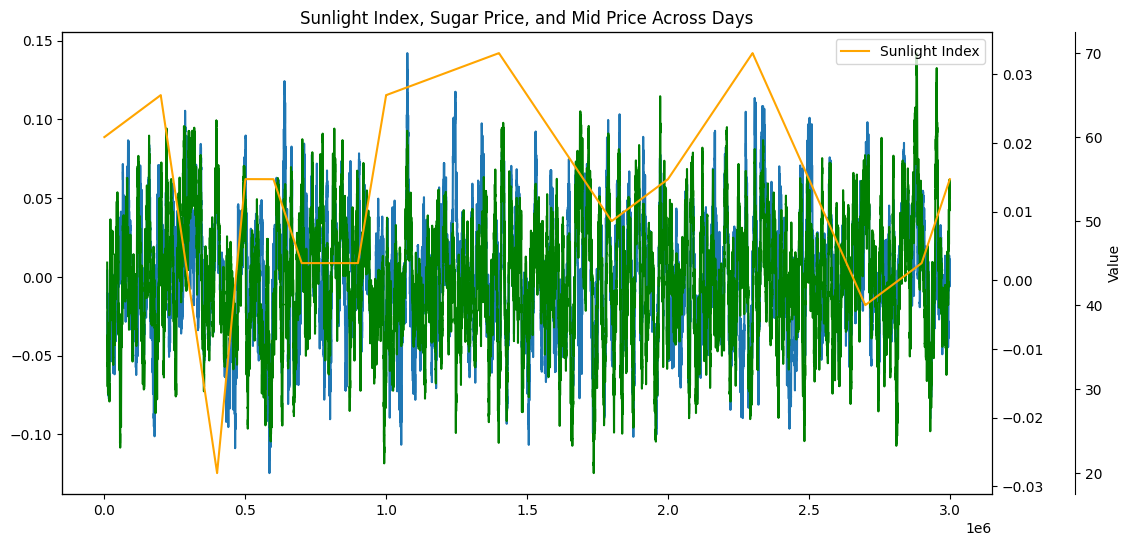

In [171]:
w = 100

# plot sunlightIndex, sugarPrice, and midPrice against time
fig, ax1 = plt.subplots(figsize=(12, 6))

ax2 = ax1.twinx()
ax3 = ax1.twinx()

# Offset the third axis to avoid overlap
ax3.spines['right'].set_position(('outward', 60))
ax1.plot(mk['time'], mk[f'macaron_returns_{w}'], label='Mid Price')
ax2.plot(mk['time'], mk[f'sugar_returns_{w}'], label='Sugar Price', color='green')
ax3.plot(mk['time'], mk['sunlightIndex'], label='Sunlight Index', color='orange')
plt.xlabel('time')
plt.ylabel('Value')
plt.title('Sunlight Index, Sugar Price, and Mid Price Across Days')
plt.xticks(rotation=45)
plt.legend()
plt.show()

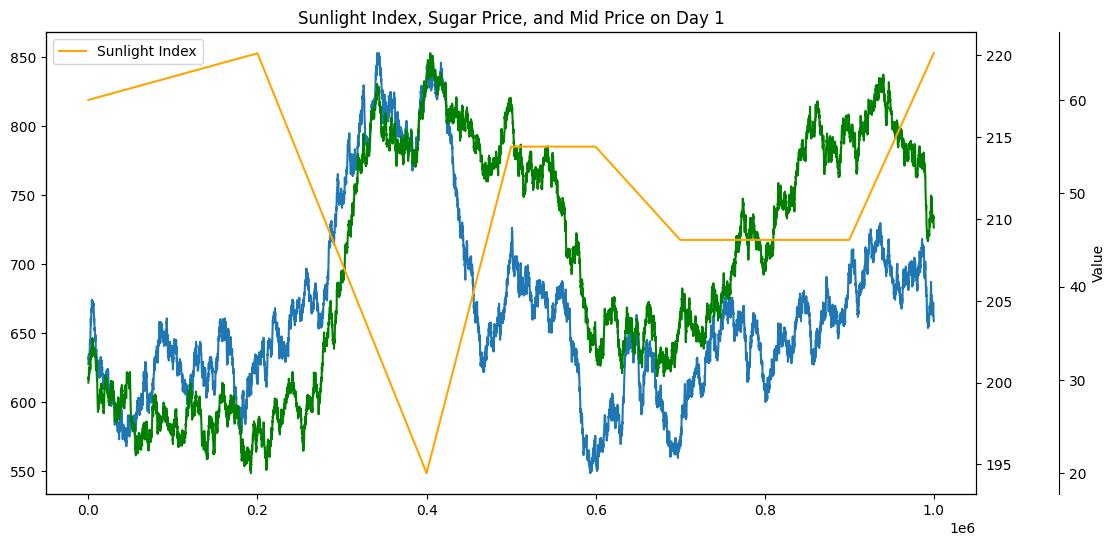

In [124]:
obs = observations[observations['day'] == 1].copy()
mkdf = macarons[macarons['day'] == 1].copy()

# plot sunlightIndex, sugarPrice, and midPrice against timestamp
fig, ax1 = plt.subplots(figsize=(12, 6))

ax2 = ax1.twinx()
ax3 = ax1.twinx()

# Offset the third axis to avoid overlap
ax3.spines['right'].set_position(('outward', 60))
ax1.plot(obs['timestamp'], (obs['bidPrice'] + obs['askPrice']) / 2, label='Mid Price')
ax2.plot(obs['timestamp'], obs['sugarPrice'], label='Sugar Price', color='green')
ax3.plot(obs['timestamp'], obs['sunlightIndex'], label='Sunlight Index', color='orange')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Sunlight Index, Sugar Price, and Mid Price on Day 1')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [ ]:
'''
regression on price for macaron to predict sugar assuming sugar is a componenet of macaron and we're simply trying to find the cost relationship?
'''



In [ ]:
'''
eda observations:
- low sunlight ~ high macaron price
- a bit lagged

- why does sugar price seem to be affected by sunlight?
- macaron seems to lag sugar price, shouldn't it be other way around?



ideas for models to try:
1. linear regression on current sunlight and sugar price to predict current mid price
2. predict return based on current sunlight and sugar price
2. return based on change in sunlight and sugar price



'''

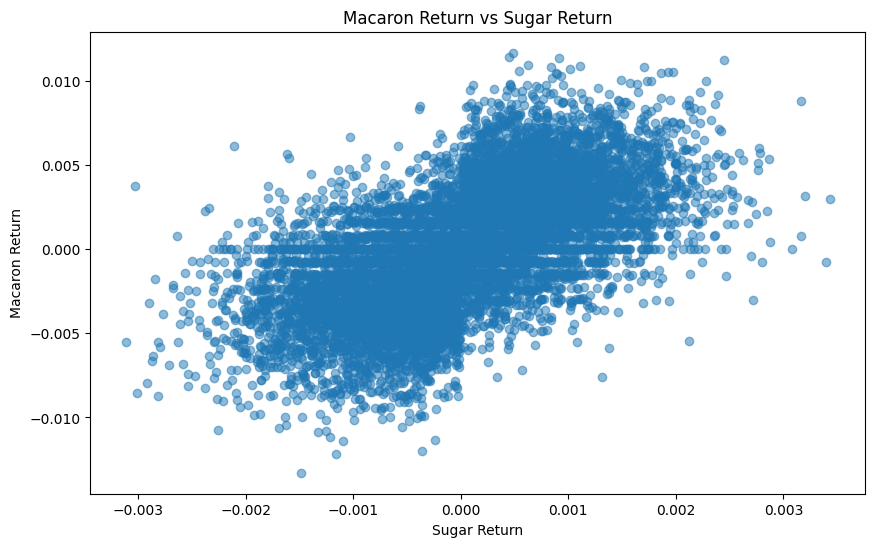

In [ ]:
sugar_return = obs['sugarPrice'].pct_change()
macaron_mid = (obs['bidPrice'] + obs['askPrice']) / 2
macaron_return = macaron_mid.pct_change()

# plot macaron return against sugar return
plt.figure(figsize=(10, 6))
plt.scatter(sugar_return[1:], macaron_return[1:], alpha=0.5)
plt.xlabel('Sugar Return')
plt.ylabel('Macaron Return')
plt.title('Macaron Return vs Sugar Return')
plt.show()

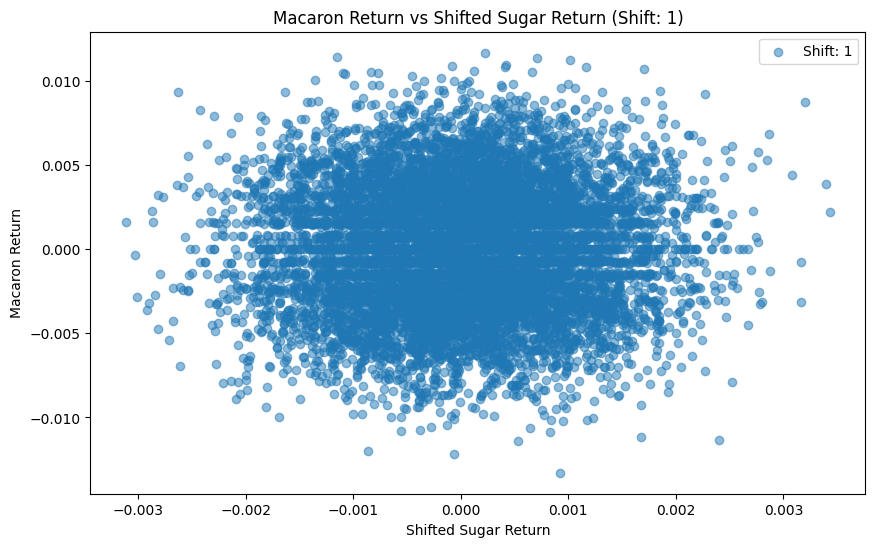

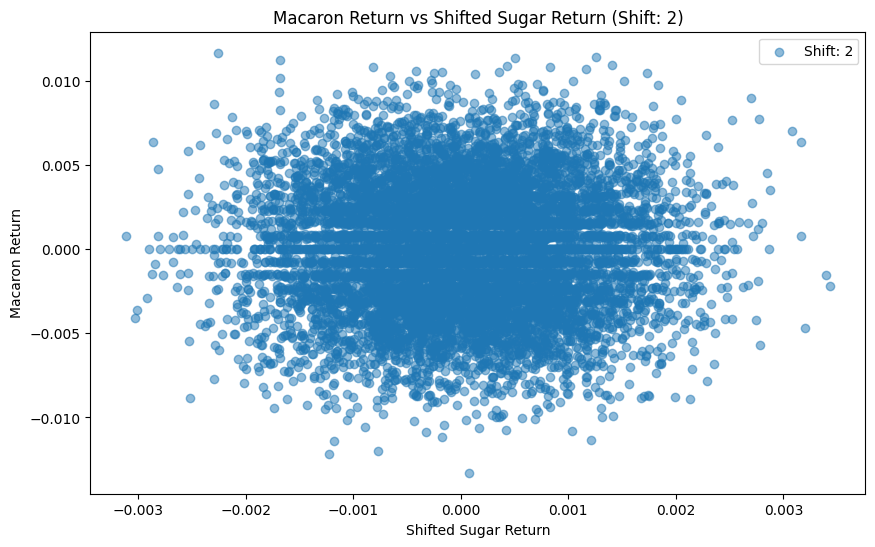

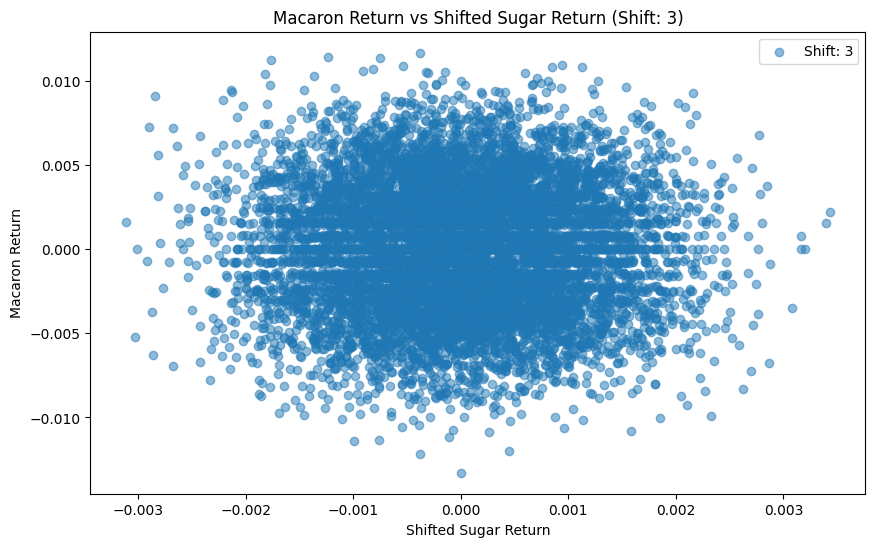

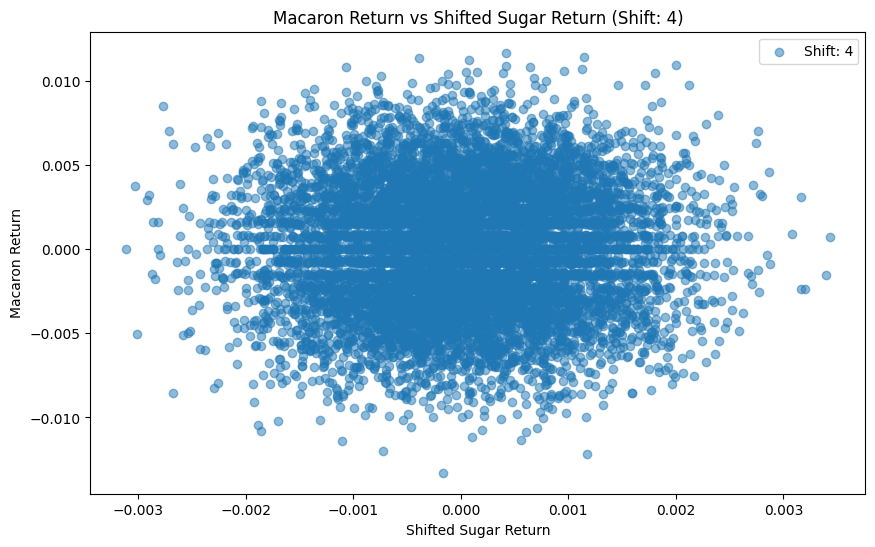

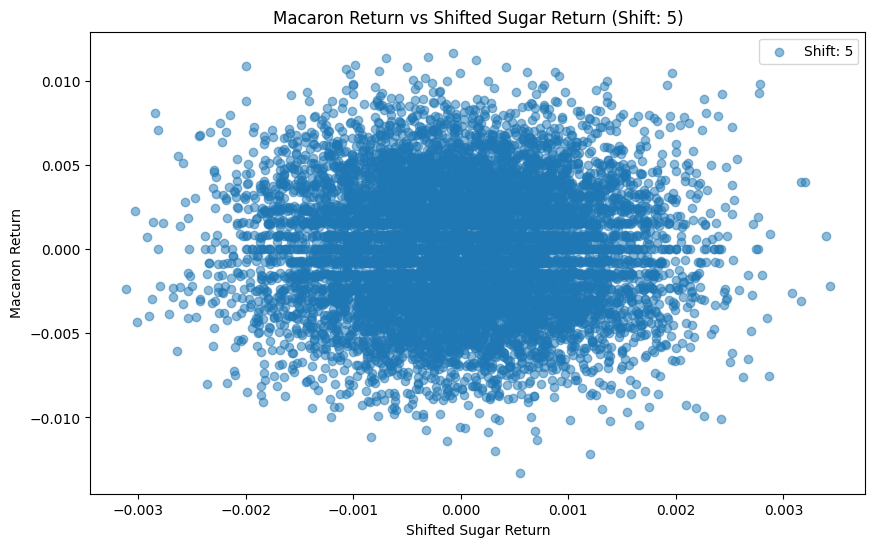

In [67]:
sugar_return = obs['sugarPrice'].pct_change()
for shift in range(1, 6):  # Shift sugar returns by 1 to 5 timestamps
    shifted_sugar_return = sugar_return.shift(shift)
    plt.figure(figsize=(10, 6))
    plt.scatter(shifted_sugar_return[shift:], macaron_return[shift:], alpha=0.5, label=f'Shift: {shift}')
    plt.xlabel('Shifted Sugar Return')
    plt.ylabel('Macaron Return')
    plt.title(f'Macaron Return vs Shifted Sugar Return (Shift: {shift})')
    plt.legend()
    plt.show()

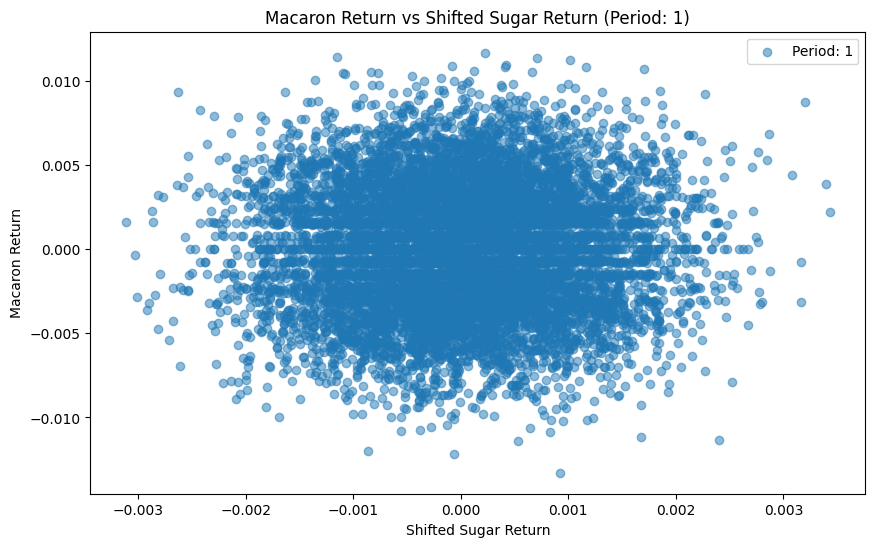

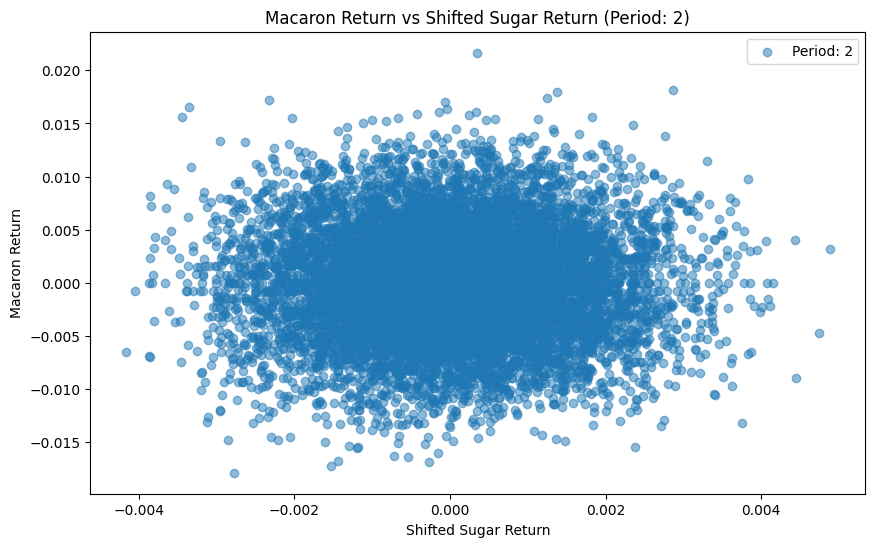

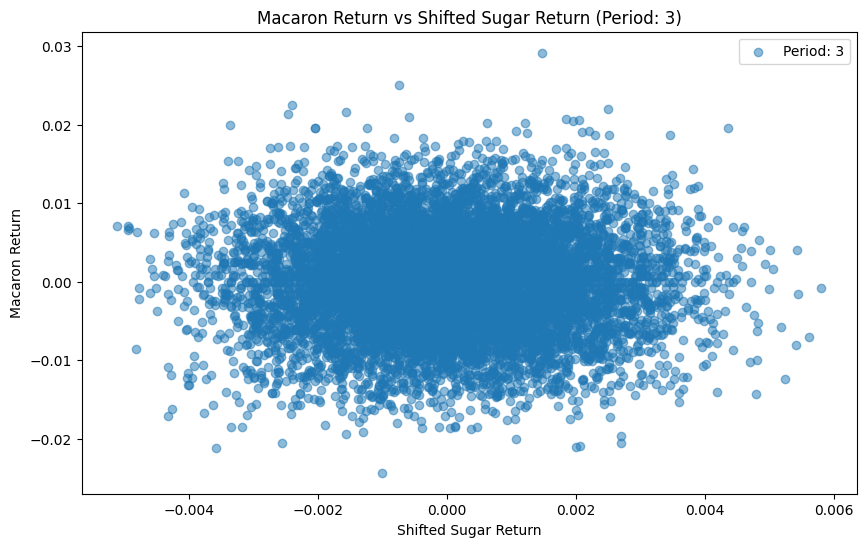

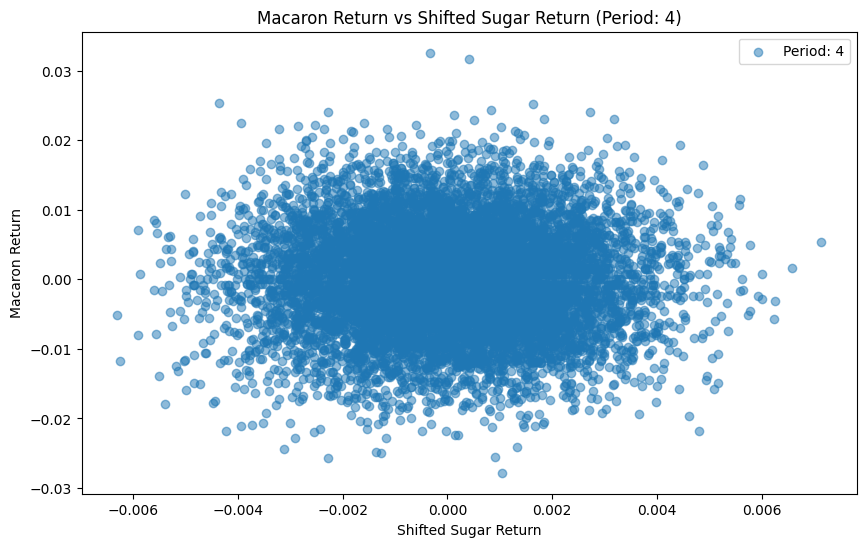

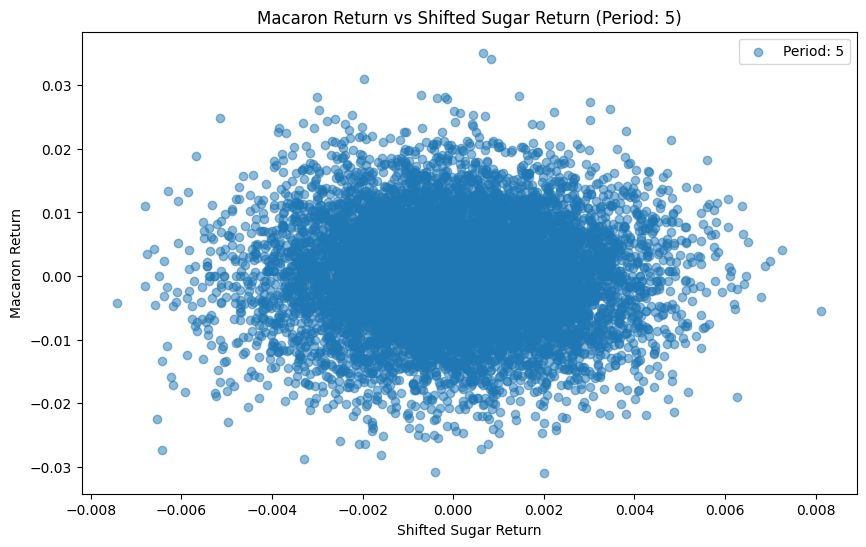

In [69]:
for period in range(1, 6):  # Shift sugar returns by 1 to 5 timestamps
    sugar_return = obs['sugarPrice'].pct_change(periods=period)
    macaron_return = macaron_mid.pct_change(periods=period)
    shifted_sugar_return = sugar_return.shift(period)
    plt.figure(figsize=(10, 6))
    plt.scatter(shifted_sugar_return[shift:], macaron_return[shift:], alpha=0.5, label=f'Period: {period}')
    plt.xlabel('Shifted Sugar Return')
    plt.ylabel('Macaron Return')
    plt.title(f'Macaron Return vs Shifted Sugar Return (Period: {period})')
    plt.legend()
    plt.show()

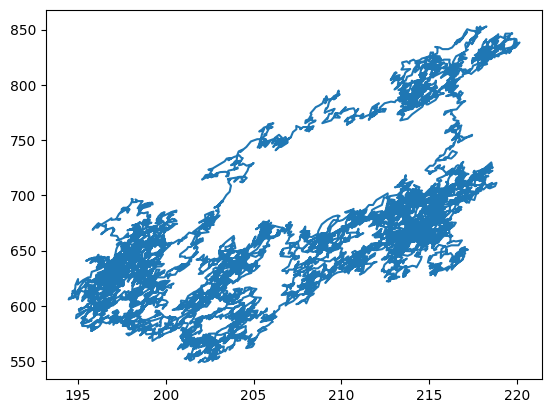

In [70]:
plt.plot(obs['sugarPrice'], macaron_mid)

In [ ]:
np.log(mkdf['mid_price'] / mkdf['mid_price'].shift(1))

0            NaN
1       0.004769
2       0.000000
3       0.003167
4      -0.001582
          ...   
9995   -0.011274
9996   -0.001513
9997   -0.001515
9998   -0.001517
9999    0.000000
Name: mid_price, Length: 10000, dtype: float64

In [102]:
macaron_mid = (obs['bidPrice'] + obs['askPrice']) / 2

macaron_returns = np.log(macaron_mid / macaron_mid.shift(1))
sugar_returns = np.log(obs['sugarPrice'] / obs['sugarPrice'].shift(1))
sunlight = obs['sunlightIndex']

data = pd.concat([macaron_returns, sugar_returns, sunlight], axis=1)
data.columns = ['macaron_returns', 'sugar_returns', 'sunlight']
data = data.dropna().reset_index(drop=True)
data

,macaron_returns,sugar_returns,sunlight
0,0.004768,0.000492,60.00
1,0.000000,0.000027,60.00
2,0.003166,0.001241,60.01
3,-0.002373,-0.000754,60.01
4,0.005529,0.001655,60.01
...,...,...,...
9994,-0.010896,-0.001332,64.94
9995,-0.002269,-0.001722,64.96
9996,-0.001516,-0.000287,64.98
9997,-0.000759,-0.000105,65.00


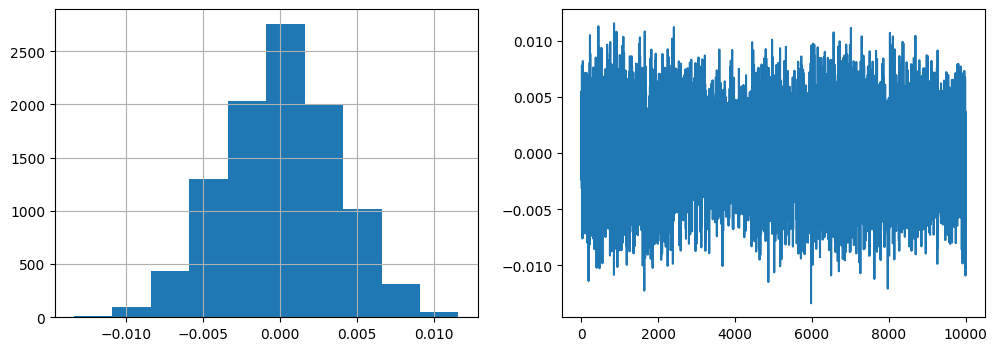

In [117]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
data['macaron_returns'].hist()
plt.subplot(1, 2, 2)
data['macaron_returns'].plot()
plt.show()

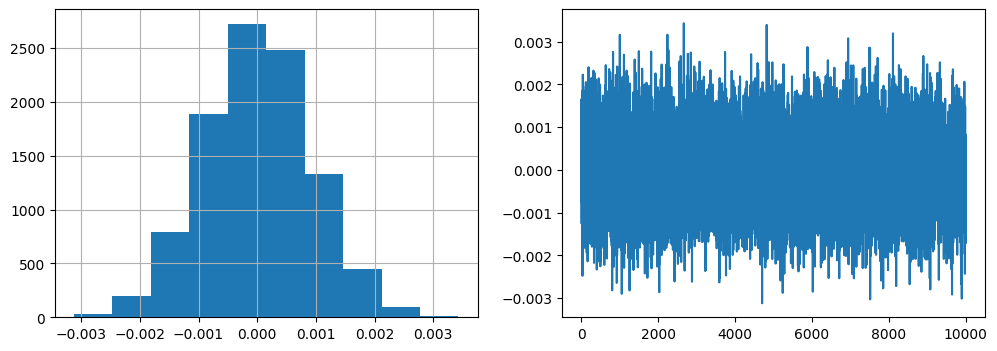

In [118]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
data['sugar_returns'].hist()
plt.subplot(1, 2, 2)
data['sugar_returns'].plot()
plt.show()

In [119]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series, name):
    result = adfuller(series.dropna())
    print(f'ADF Statistic for {name}: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Stationary' if result[1] < 0.05 else 'Non-stationary')

check_stationarity(data['macaron_returns'], 'Macaron Returns')
check_stationarity(data['sugar_returns'], 'Sugar Returns')

ADF Statistic for Macaron Returns: -45.20998078682906
p-value: 0.0
Stationary
ADF Statistic for Sugar Returns: -98.3989909068245
p-value: 0.0
Stationary


In [121]:
from statsmodels.tsa.vector_ar.var_model import VAR
import numpy as np

# Find optimal lag length
model = VAR(data)
lag_order_results = {}

for lag in range(1, 51):  # Testing lags 1-10
    result = model.fit(lag)
    lag_order_results[lag] = {
        'AIC': result.aic,
        'BIC': result.bic,
        'FPE': result.fpe,
        'HQIC': result.hqic
    }

# Convert to DataFrame for easier viewing
lag_orders_df = pd.DataFrame(lag_order_results).T
print(lag_orders_df)

# Find minimum values
best_aic = lag_orders_df['AIC'].idxmin()
best_bic = lag_orders_df['BIC'].idxmin()
print(f"Best lag according to AIC: {best_aic}")
print(f"Best lag according to BIC: {best_bic}")

          AIC        BIC           FPE       HQIC
1  -33.853921 -33.845267  1.983485e-15 -33.850992
2  -36.266613 -36.251467  1.776684e-16 -36.261486
3  -36.443137 -36.421498  1.489179e-16 -36.435812
4  -36.902270 -36.874138  9.409091e-17 -36.892747
5  -36.990957 -36.956329  8.610564e-17 -36.979235
6  -37.297009 -37.255885  6.340372e-17 -37.283089
7  -37.461287 -37.413665  5.379848e-17 -37.445166
8  -37.462829 -37.408710  5.371554e-17 -37.444509
9  -38.025985 -37.965366  3.058614e-17 -38.005465
10 -38.095199 -38.028079  2.854076e-17 -38.072478
11 -38.268515 -38.194893  2.399912e-17 -38.243593
12 -38.267388 -38.187264  2.402616e-17 -38.240265
13 -38.278054 -38.191425  2.377128e-17 -38.248729
14 -38.336411 -38.243277  2.242375e-17 -38.304884
15 -38.337152 -38.237512  2.240714e-17 -38.303422
16 -38.336677 -38.230530  2.241779e-17 -38.300744
17 -38.387667 -38.275011  2.130337e-17 -38.349530
18 -38.406683 -38.287517  2.090209e-17 -38.366342
19 -38.422986 -38.297310  2.056408e-17 -38.380441


In [122]:
data

,macaron_returns,sugar_returns,sunlight
0,0.004768,0.000492,60.00
1,0.000000,0.000027,60.00
2,0.003166,0.001241,60.01
3,-0.002373,-0.000754,60.01
4,0.005529,0.001655,60.01
...,...,...,...
9994,-0.010896,-0.001332,64.94
9995,-0.002269,-0.001722,64.96
9996,-0.001516,-0.000287,64.98
9997,-0.000759,-0.000105,65.00


In [103]:
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(data)

results = model.fit(maxlags=10, ic='aic')

In [104]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 16, Apr, 2025
Time:                     19:28:23
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -38.0281
Nobs:                     9989.00    HQIC:                  -38.0725
Log likelihood:           147838.    FPE:                2.85408e-17
AIC:                     -38.0952    Det(Omega_mle):     2.82767e-17
--------------------------------------------------------------------
Results for equation macaron_returns
                         coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------
const                      -0.000014         0.000174           -0.082           0.934
L1.macaron_returns          0.002642         0.012698            0.208           0.835
L1.sugar_returns          

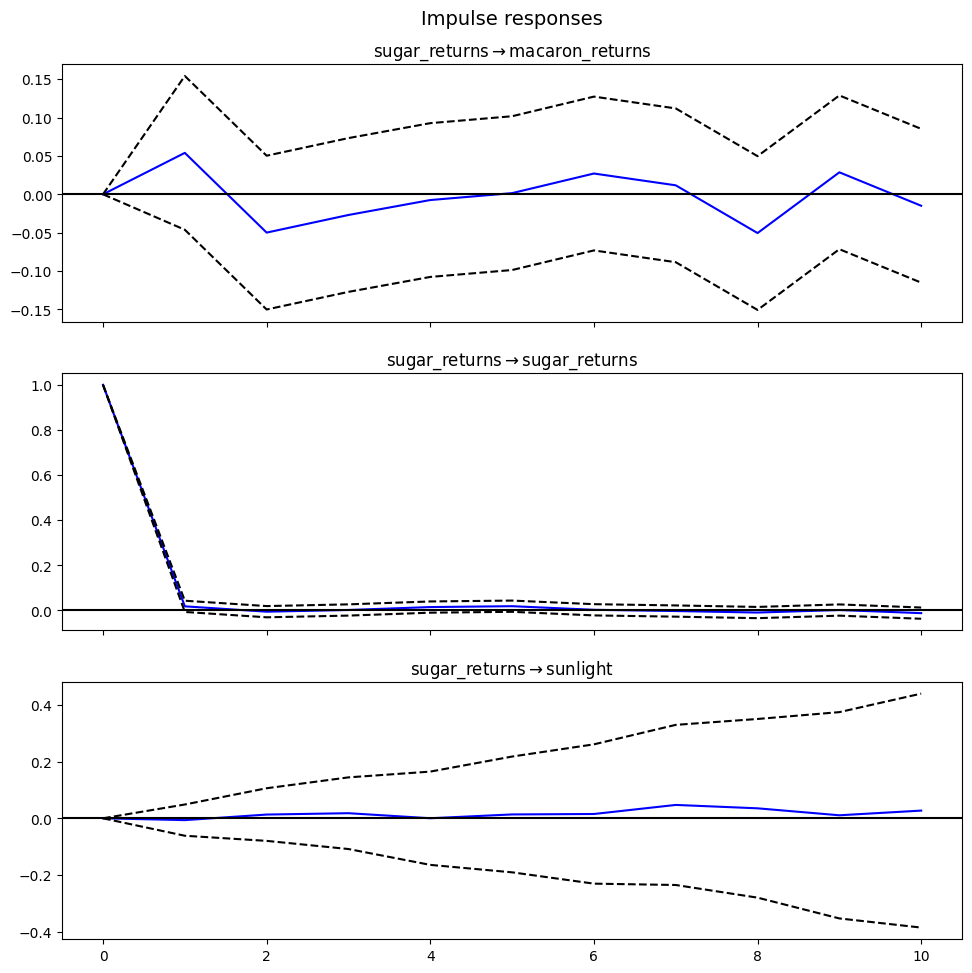

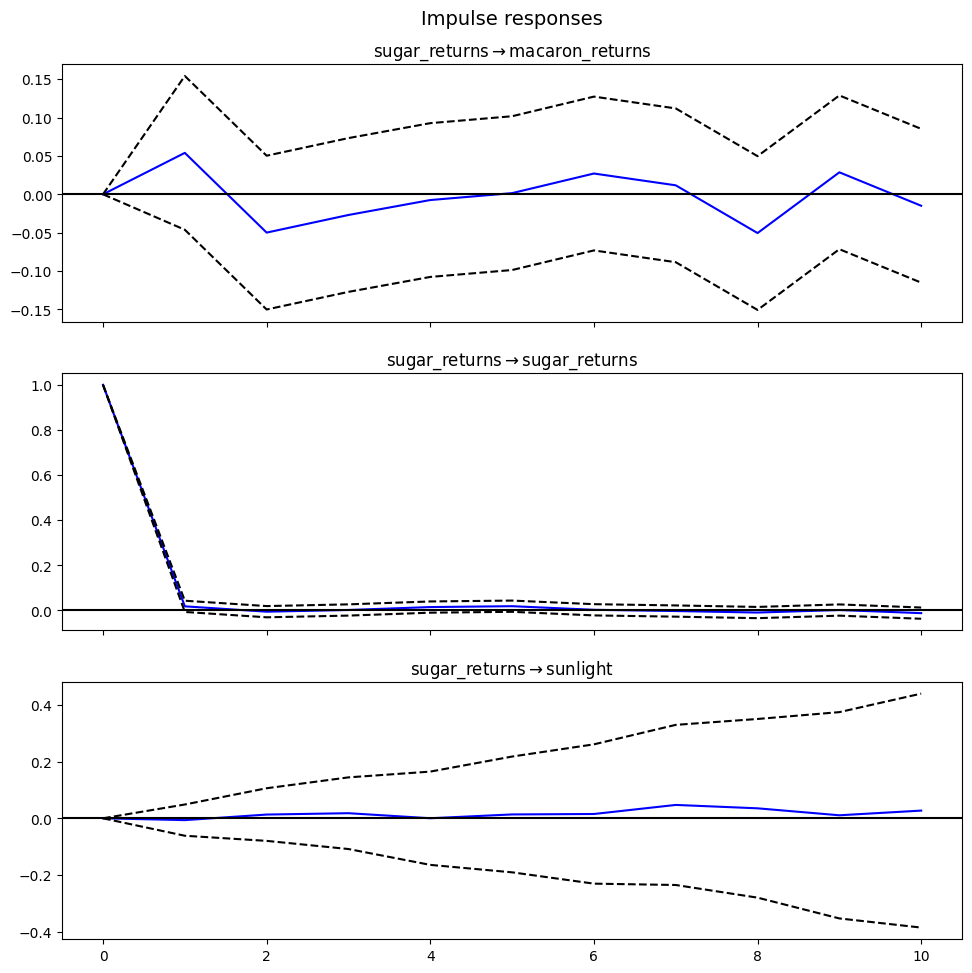

In [105]:
irf = results.irf(periods=10)
irf.plot(impulse='sugar_returns')